# Stock Market Analysis

- Analyse stock data related to Tesla, Ford and General Motors(GM), from Jan 1st 2012 to
Jan 1 2017. 
- This project is used to practice my skills with matplotlib, pandas and numpy.
***

#### Import

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime 

# Set the graph styles to
plt.style.use('classic')
mpl.rcParams['patch.force_edgecolor'] = True
# Magic function which allows matplotlib graphs to be included in the notebook, next to the code 
%matplotlib inline

## Reading Data

In [10]:
tesla = pd.read_csv('Tesla_Stock.csv',index_col = 'Date', parse_dates = True)
ford = pd.read_csv('Ford_Stock.csv',index_col = 'Date', parse_dates = True)
gm  = pd.read_csv('GM_Stock.csv',index_col = 'Date', parse_dates = True)

## Visualising the data

##### Open Price

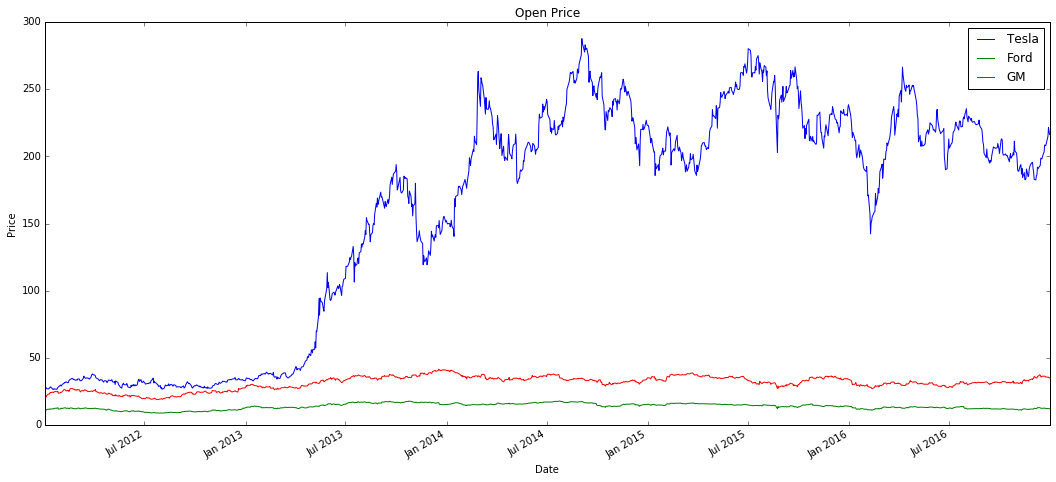

In [20]:
tesla['Open'].plot(label = 'Tesla',figsize=(18,8),lw = 1, title = 'Open Price')
ford['Open'].plot(label = 'Ford', lw = 1)
gm['Open'].plot(label = 'GM', lw = 1)
plt.ylabel("Price")
plt.legend();

- The Open Price graph makes Tesla look like it's always been much more valuable than GM and Ford.
- It would be better to look at the total market cap to get a clearer understanding but current data does not have information of the total units of stock. 
- An alternative would be to carry out a crude calculation of total money traded which would be to multiply the volume by open price.

##### Volume Traded

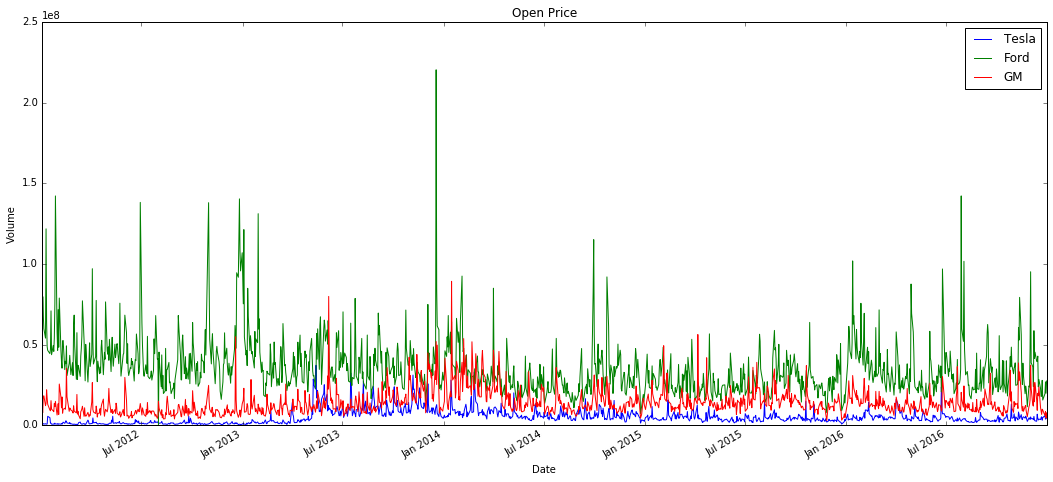

In [21]:
tesla['Volume'].plot(label = 'Tesla',figsize=(18,8), lw = 1, title = 'Open Price')
ford['Volume'].plot(label = 'Ford', lw = 1)
gm['Volume'].plot(label = 'GM', lw = 1)
plt.ylabel("Volume")
plt.legend();

 - Using: ford['Volume'].idxmax() = Timestamp('2013-12-18 00:00:00')
 - We see a large spike on this date due to Ford announcing a profit warning that said the cost of launching new products would cut into the next year's profits which in turn caused a big sell off of their stock.

##### Total Money Trade [Volume*Open Price]

In [15]:
# Create new column for each dataframe which contains Volume * Open Price
tesla['Total Traded'] = tesla['Volume']*tesla['Open']
ford['Total Traded'] = ford['Volume']*ford['Open'] 
gm['Total Traded'] = gm['Volume']*gm['Open'] 

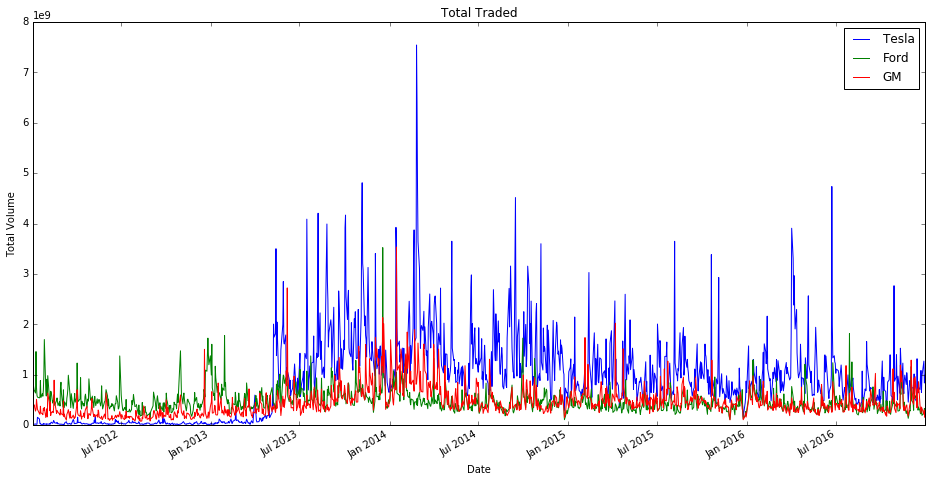

In [19]:
# Visualisation of total money being traded
tesla['Total Traded'].plot(figsize=(16,8),title='Total Traded',label='Tesla')
ford['Total Traded'].plot(figsize=(16,8),title='Total Traded',label='Ford')
gm['Total Traded'].plot(figsize=(16,8),title='Total Traded',label='GM')
plt.ylabel('Total Volume')
plt.legend(loc=0);

- tesla['Total Traded'].idxmax() = Timestamp('2014-02-25 00:00:00')
- Large amount of money traded for Tesla which was due to a bullish report from MS and the Tesla Model S being named the best overall car of 2014.

## Moving Averages

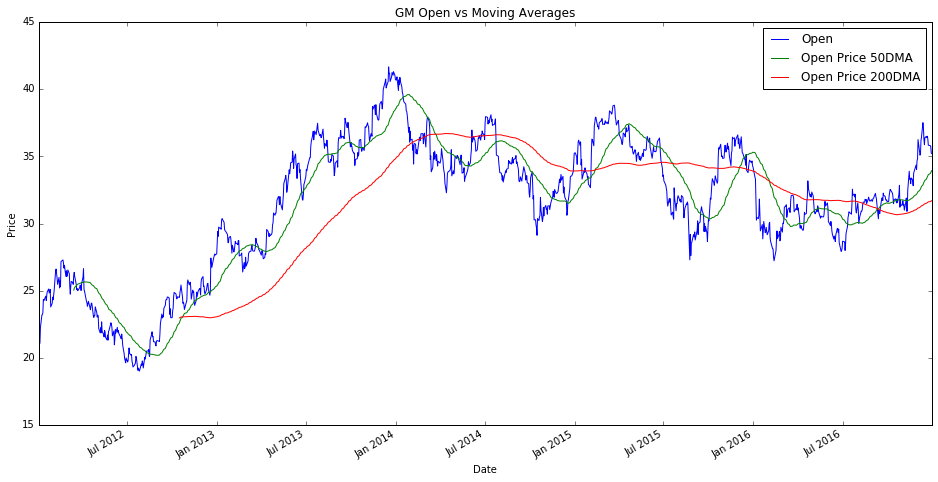

In [32]:
gm['Open Price 50DMA'] = gm['Open'].rolling(50).mean()
gm['Open Price 200DMA'] = gm['Open'].rolling(200).mean()
gm[['Open','Open Price 50DMA','Open Price 200DMA']].plot(figsize=(16,8),title = 'GM Open vs Moving Averages')
plt.ylabel('Price');

## Scatter Matrix Plot

In [33]:
from pandas.plotting import scatter_matrix

In [42]:
scatter_df = pd.concat((tesla['Open'],ford['Open'],gm['Open']),axis = 1)
scatter_df.columns = ['Tesla Open','Ford Open','GM Open']

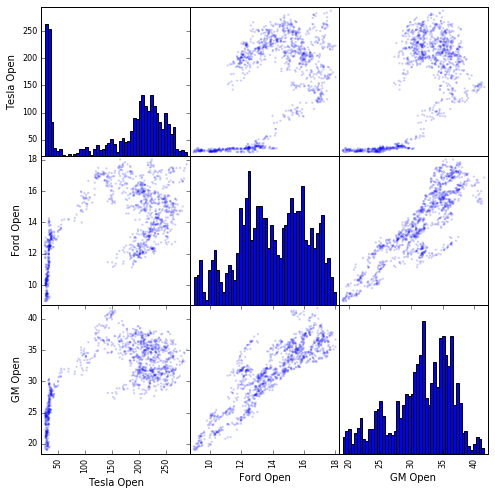

In [51]:
scatter_matrix(scatter_df,hist_kwds={'bins':50},alpha=0.2,figsize=(8,8),c = 'b');

- GM and Ford have a positive correlation while Tesla is not related and has different behaviour. This is expected since we saw from the Opening prices time series that it had a much more different behaviour and price level when compared to GM and Ford.
- Using a smaller alpha a